In [207]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Context

In [208]:
train_data = pd.read_csv('train.csv')
print(train_data.head(10))
train_data.shape

   PassengerId  Survived  Pclass               Name     Sex    Age  SibSp  \
0            0         1       1   Oconnor, Frankie    male    NaN      2   
1            1         0       3        Bryan, Drew    male    NaN      0   
2            2         0       3     Owens, Kenneth    male   0.33      1   
3            3         0       3      Kramer, James    male  19.00      0   
4            4         1       3      Bond, Michael    male  25.00      0   
5            5         0       2  Sassano, Jonathan    male  35.00      0   
6            6         0       3       Conway, Jose    male   7.00      0   
7            7         1       3      Werner, Linda  female   6.00      1   
8            8         0       1   Wardlaw, Michael    male  27.00      2   
9            9         0       2       Greigo, Rudy    male  66.00      0   

   Parch     Ticket   Fare   Cabin Embarked  
0      0     209245  27.14  C12239        S  
1      0      27323  13.35     NaN        S  
2      2  CA 4

(100000, 12)

In [209]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


# Data quality assessment

In [210]:
train_data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

In [211]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [212]:
train_data.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,100000,100000,95377,32134,99750
unique,92144,2,75331,26992,3
top,"Johnson, John",male,A/5,C19828,S
freq,31,56114,602,6,72139


# Data exploration

<AxesSubplot:xlabel='count', ylabel='Survived'>

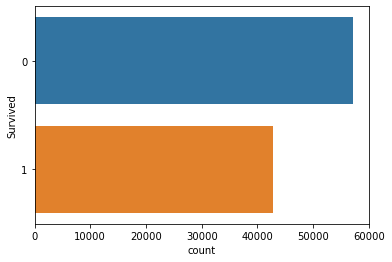

In [213]:
sns.countplot(y='Survived', data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

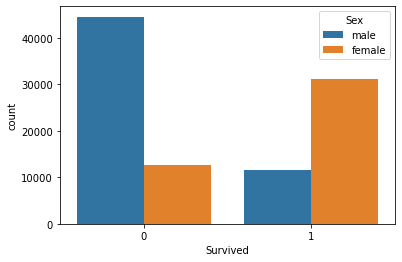

In [214]:
sns.countplot(x='Survived', hue='Sex', data=train_data)

Sex     female   male
Pclass               
1        16084  14231
2        15283  13396
3        12519  28487


Text(0, 0.5, 'Percentage')

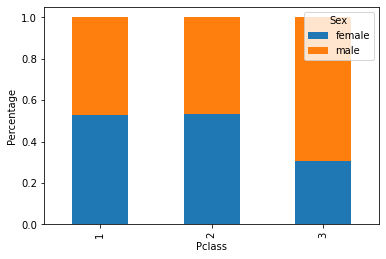

In [215]:
tab = pd.crosstab(train_data['Pclass'], train_data['Sex'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

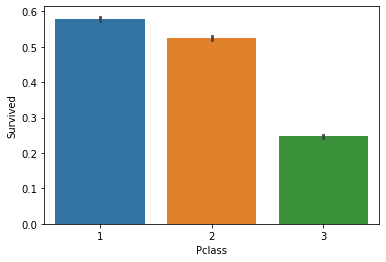

In [216]:
#train_data.groupby('Pclass').Survived.mean().plot(kind='bar')
sns.barplot(x='Pclass', y='Survived', data=train_data)

<AxesSubplot:xlabel='Fare'>

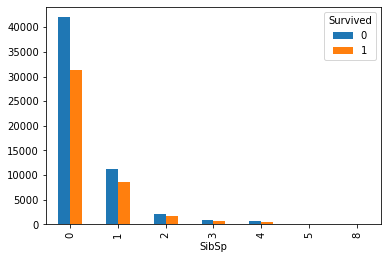

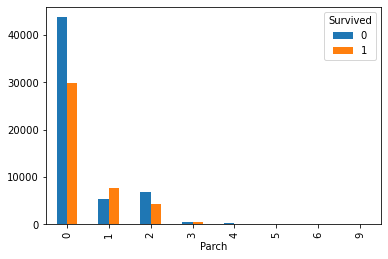

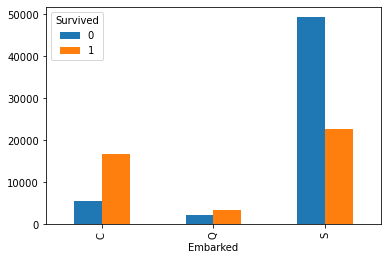

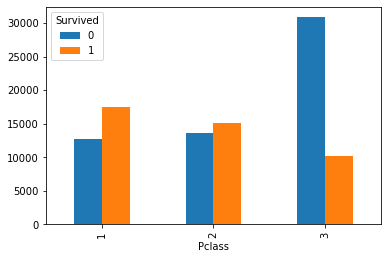

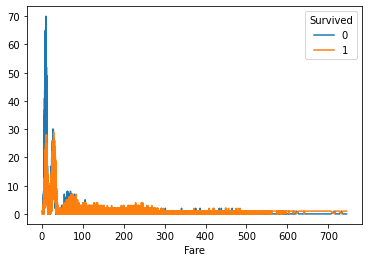

In [217]:
pd.crosstab(train_data['SibSp'],train_data['Survived']).plot(kind='bar') # Братья и сестры / супруги
pd.crosstab(train_data['Parch'],train_data['Survived']).plot(kind='bar') # Кол-во родителей / детей
pd.crosstab(train_data['Embarked'],train_data['Survived']).plot(kind='bar') # Посадочный порт
pd.crosstab(train_data['Pclass'],train_data['Survived']).plot(kind='bar') # Уровень каюты
pd.crosstab(train_data['Fare'],train_data['Survived']).plot() # Стоимость билета на лодку

<AxesSubplot:xlabel='Sex', ylabel='Age'>

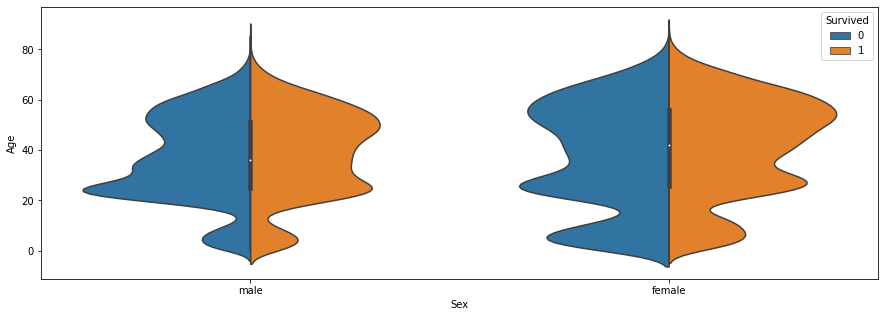

In [218]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot()
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_data, split=True, ax=ax1)

# Summary

In [219]:
#В наборе данных 100000 строк и 12 столбцов.

In [220]:
#В столбцах Age у нас 3292 пропусков, Ticked - 4623 пропусков, Fare - 134 пропуска, Embarked - 250 пропусков, а в Cabin - 67866 пропусков, что составляет больше половины.

In [221]:
#Видно, что сущесвуют дубликаты номеров билетов Ticket и переиспользуются каюты Cabins (уникальных записей (unique) меньше, чем общего количества). Самый большой порядок дубликата билета - "A/5" раза. Он повторился 602 . Аналогично, наибольшее число людей, занимающих одну и ту же каюту - 6.
#Также можно заметить, что 72139 человек отбыли из порта "S".
#Среди 100000 записей, 56114 были мужчины (Male) и оставшием женщины (Female).

In [222]:
#Выжило людей меньше, чем погибло.

In [223]:
#Мужчин погибло гораздо больше, чем выжило. Большая часть женщин выжила.

In [224]:
#Cреди пассажиров 3 Класса больше мужчин.

In [225]:
#Большинство погибших - пассажиры 3 класса.

In [226]:
#У пассажиров с семьей 1-2 человека выше выживаемость.
#Порт C имеет более высокую выживаемость.
#Чем выше уровень салона (1> 2> 3) / чем выше цена билета, тем выше выживаемость